# Central limit theorem

## Basic idea

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) basically says that in many cases, if one sums up independent random variables then the resulting distribution approaches a normal distributions as the number of summands increases.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab  as pylab

import numpy as np
import scipy.stats

from mpl_toolkits.mplot3d import Axes3D

params = {
    "legend.fontsize" : "xx-large",
    "axes.labelsize"  : "xx-large",
    "axes.titlesize"  : "xx-large",
    "xtick.labelsize" : "xx-large",
    "ytick.labelsize" : "xx-large"
}

pylab.rcParams.update(params)

In [9]:
def sample_distribution(
        num_samples,
        num_samples_of_samples,
        distribution,
        distribution_name,
        plot=False
    ):
        sample = 0
        
        samples = []
        
        for n in range(num_samples_of_samples):
            for _ in range(num_samples):
                sample += distribution()
                
            samples.append(sample)
            
            sample = 0
        
        if plot:
            plt.hist(samples, bins=100)
            plt.xlabel("Value")
            plt.ylabel("Frequency")
            plt.title("Sampling from " + distribution_name + " distribution")
        
        return samples

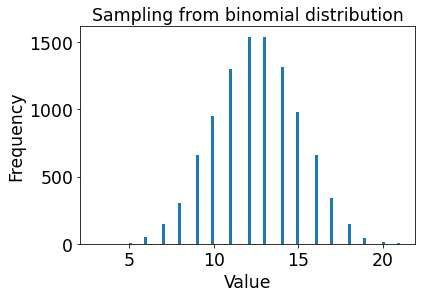

In [13]:
sample_distribution(25, 10000, lambda : scipy.stats.binom.rvs(n=1, p=0.5), "binomial", plot=True);

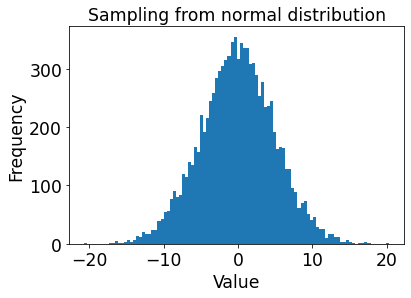

In [38]:
sample_and_plot_distribution(25, 10000, scipy.stats.norm.rvs, "normal", plot=True);

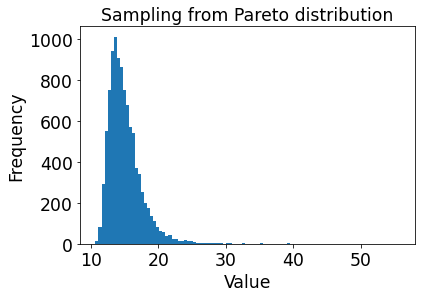

In [16]:
sample_distribution(10, 10000, lambda : scipy.stats.pareto.rvs(b=3), "Pareto", plot=True);

## Failure of central limit theorem in practice

In practice, many things follow fat-tailed distributions, like stock prices. However, for such distributions e.g. Pareto distribution, the central limit theorem does not hold well. As the theorem does not hold well, there are in practice many things for which we cannot use normal-distribution-based tools.

That the theorem does not hold well is confirmed by the function `central_limit_theorem_failure`. In this function, increasing the number of summands from the Pareto distribution from 5 to 200 still does not make the samples look normally distributed.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


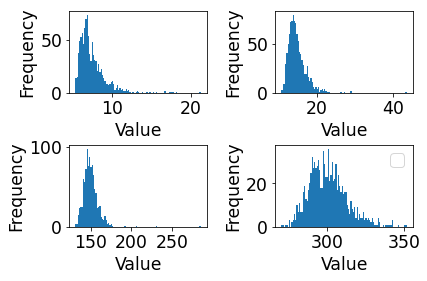

In [32]:
def central_limit_theorem_failure():
    fig, axs = plt.subplots(nrows=2, ncols=2)
    
    num_samples = [5, 10, 100, 200]
    
    num_samples_of_samples = 1_000
    
    fig.tight_layout(pad=2)
    
    for i, ax in enumerate(axs.flat):
        samples = sample_distribution(
            num_samples[i], 
            num_samples_of_samples, 
            lambda : scipy.stats.pareto.rvs(b=3), 
            "Pareto"
        )
        
        ax.hist( samples, bins=100 )
        
        plt.setp( ax, xlabel="Value", ylabel="Frequency")
        
        plt.legend()
        
central_limit_theorem_failure()